<a href="https://colab.research.google.com/github/pj0620/google-colab-notebooks/blob/main/sb_paradox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import random

head_count = 0
tail_count = 0

for _ in range(10000):
  # SB put to sleep

  # coin is flipped
  coin_toss = random.choice([True, False])

  # if coin is heads, wake up SB
  if coin_toss:
    head_count += 1

  # if coin is tails, wake up SB twice
  else:
    tail_count += 2

print(f"probabilty of heads = {head_count / (head_count + tail_count)}")

probabilty of heads = 0.33288903698767075


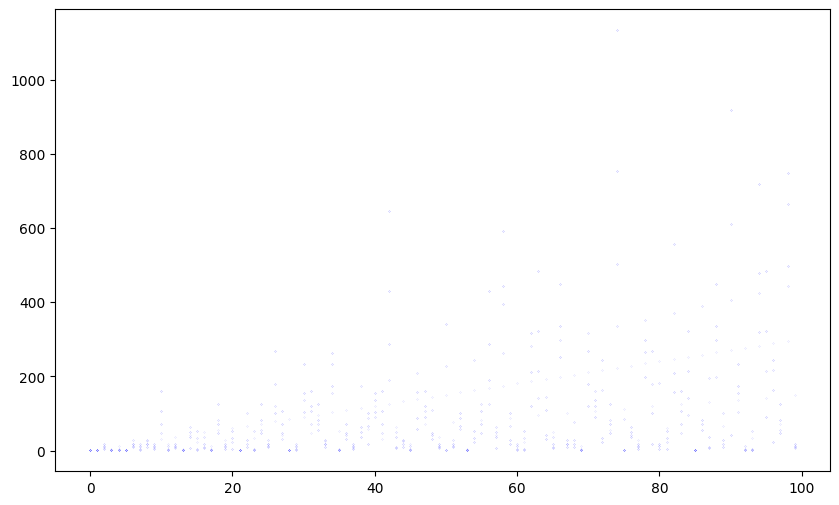

In [64]:
import matplotlib.pyplot as plt

# u(3 * x + 1) = u(2 * (3x + 1)) = u(6x+2) = u(3 * (2x + 1/3) + 1)
# x -> 2x + 1/3
# x -> (x - 1/3)/2 = x/2 - 1/6

plt.figure(figsize=(10, 6))

max_depth = 5

u = lambda x: x if x%2==1 else u(x//2)
c = lambda x: u(3 * x + 1)
R = lambda f, n, x: f(x) if n == 0 else f(R(f, n - 1, x))

X = list(range(100))
Ys = [
  [ R(c, depth, x) for x in X]
  for depth in range(max_depth)
]

def smoothstep(x):
  return 3 * x**2 - 2 * x**3

def aggressive_step(x, n=3):
  return 1 - (1 - x)**n

mins = [
    min(Ys[depth][X])
]
for depth in range(max_depth):
  alph = (depth + 1) / max_depth
  opac = aggressive_step(alph)
  plt.scatter(X, Ys[depth], color='blue', alpha=opac, s=0.01)

l_vals = [f"Y{i}" for i in range(max_depth)]

# plt.legend(l_vals)
plt.show()

In [42]:
R(c, 1, 4)

5